# Gradient Boost Regressor Algorithm  - ensemble technique

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
# load _dataset  # boston data

from sklearn.datasets import load_boston

In [7]:
boston = load_boston()

In [8]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [9]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
#model training and evalution

In [42]:
gradi_regre = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [43]:
#train  model

In [44]:
model = gradi_regre.fit(X_train,y_train)

In [45]:
# predict

In [46]:
y_pred = model.predict(X_test)

In [47]:
r2_score(y_pred,y_test)

0.7471804761227412

# Plot feature Importance

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
feature_importance = model.feature_importances_

In [22]:
feature_importance = 100.0*(feature_importance / feature_importance.max())

In [25]:
sorted_index = np.argsort(feature_importance)
pos = np.arange(sorted_index.shape[0])+.5

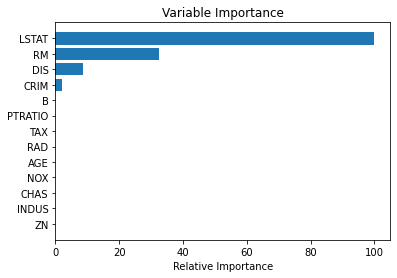

In [26]:
plt.barh(pos, feature_importance[sorted_index], align='center')
plt.yticks(pos,boston.feature_names[sorted_index])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [27]:
# we can see 4 importannt feature for our model

# Lets tune hyperparameter

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

In [32]:
tunning = GridSearchCV(estimator = GradientBoostingRegressor() ,param_grid=LR, scoring='r2')

In [33]:
tunning.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.15, 0.1, 0.1, 0.05],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='r2')

In [34]:
tunning.best_params_, tunning.best_score_

({'learning_rate': 0.05, 'n_estimators': 200}, 0.8828223401576534)

In [35]:
## wecan see from above output , that, we acan get  best model at learning rate = 0.05, and n_estimators = 200, .
#  i. e. 88.28 % accuracy